# Introduction
This project is gathering data about WeRateDogs Twitter page rating tweets, Wrangling these data , Then anlyzing it to generate some conclusions. 

# Gather

In [203]:
# calling required libraries 
import pandas as pd 
import numpy as np
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline 
# displacy the full content of each row
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [204]:
# load the twitter-archive-enhanced file as pandas DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [205]:
# download image predictions file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file_name = url.split('/')[-1]
response =  requests.get(url)


if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as f:
        f.write(response.content)
    
# load image-predictions file 
image_df = pd.read_csv(file_name, sep='\t')


In [206]:
# Create an API object
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_ids = archive_df.tweet_id.values


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
errors_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                Errors_dict[tweet_id] = e
                pass
end = timer()
process_time = end - start
minutes = process_time // 60
seconds = process_time % 60

# This process took 1522 seconds in the first time excuted and 25 twitter IDs data has failed to be imported 

print('\n This prosses took {} minutes and {} seconds\n'.format(minutes, seconds))
print('Data from {} tweet IDs has been succesfully imported. Conversely, Data from {} tweet IDs has failed to be imported'.format(len(tweet_ids) - len(errors_dict), len(errors_dict)))



 This prosses took 0.0 minutes and 0.00032739699963713065 seconds

Data from 2356 tweet IDs has been succesfully imported. Conversely, Data from 0 tweet IDs has failed to be imported


In [207]:
# Read the API file and save to a DataFrame
tweets_data_list = []

with open('tweet_json.txt', 'r') as json_file:
    line = json_file.readline()

    # loop through the file line by line
    while line:
        # convert to  python dict object
        line_converted = json.loads(line)

        # access desired values 
        data_id = line_converted['id']
        data_retweet_count = line_converted['retweet_count']
        data_favorite_count = line_converted['favorite_count']
        # make a dictionary of the desired values then append it to the final list 
        tweets_data_dict = {'tweet_id': data_id, 'retweet_count': data_retweet_count, 'favorite_count': data_favorite_count}
        tweets_data_list.append(tweets_data_dict)
        
        # move to the next line
        line = json_file.readline()
        
# Make a DataFrame of the tweets_data_list         
api_df = pd.DataFrame(tweets_data_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])   

# Assess

In [208]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [209]:
image_df.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [210]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7511,35530
1,892177421306343426,5575,30754
2,891815181378084864,3692,23116
3,891689557279858688,7695,38818
4,891327558926688256,8295,37098


In [211]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [212]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [213]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [214]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [215]:
archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [216]:
archive_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [217]:
archive_df.query('rating_numerator > 15').rating_numerator.value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
88      1
143     1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [218]:
archive_df.query('tweet_id == 835152434251116546')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None


In [219]:
(archive_df.loc[:, 'doggo':"puppo"] != 'None').sum()

doggo      97 
floofer    10 
pupper     257
puppo      30 
dtype: int64

In [220]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_df[(archive_df['doggo'] != 'None') & (archive_df['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None


In [221]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Quality 
#### Before fixing tidiness issues


1 - IDs in the three datasets are not in the same order<br>
2 - some tweet id data failed to be imported from twitter api  
3 - some entries are retweets not original tweets<br>
4 - some entries replies not original tweets<br>
5 - some entries don't have images<br>
6 - there are columns that are not desired after cleaning (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)<br>
7 - name column is not of use since the 'tweet_id' column is already identifying the entries<br>
8, 9 - dog's breed column has to be added to the image dataset considering this algorithem:<br>
        1. if the first pred is dog take its breed, <em>*as it has the heighst confidece*</em> <br>
        2. if not: take the breed of the second pred if dog, <em>*as it has the second heighst confidece*</em> <br>
        3. if not: take the breed of the third pred if dog<br>
        4. if not: delete the row<br>
10 - after 8 and 9: dog prediction columns are not useful and causes tidiness issues<br>
11 - some entries from image and api datasets aren't in archive dataset<br>


_________

#### After fixing tidiness issues
12 - missing values in dog_stage column are represented as empty string "" not Nan

13 - tweet with id: '835152434251116546' is not a rating tweet it is an accusation of plagiarism on another rating dog page :D 


14 - IDs are integers not strings<br>
15 - timestamp values are strings not datetime objects<br>

16 - <em>After inspecting the rating values and thier corresponding tweet text,
    I have put some Criteria for valid rating values to avoid outliers or misleading analysis:</em>
- the denominator has to be equal to 10 and numerator can't be above 15 or below
- <em>If</em> the numerator and denominator has a common factor and the denominator is a multiple of ten, devide by the common factor
- If not, delete that row


## Tidiness

1 - in the archive dataset there are column headers that are values not variables(dog stages columns)

2 - the three datasets can be presented in one master dataset




# Clean 

In [222]:
# make a copy of the original data
archive_clean = archive_df.copy()
image_clean = image_df.copy()
api_clean = api_df.copy()


## Before fixing tidiness issues

### 1 - IDs in the three datasets are not in the same order

#### define
- sort the datasets by tweet id

#### code

In [223]:
archive_clean = archive_clean.sort_values(by='tweet_id')
image_clean = image_clean.sort_values(by='tweet_id')
api_clean = api_clean.sort_values(by='tweet_id')

# reset the index of archive, image and api as these datse are sorted
archive_clean = archive_clean.reset_index(drop=True)
image_clean = image_clean.reset_index(drop=True)
api_clean = api_clean.reset_index(drop=True)

 
### 2 - some tweet id data failed to be imported from twitter api 

#### define
- delete the rows of these IDs from archive and image dataframes  

#### code

In [224]:
api_id = api_clean.tweet_id


filter_api = archive_clean[~archive_clean.tweet_id.isin(api_id)]
archive_clean = archive_clean.drop(filter_api.index)

#### test

In [225]:
archive_clean[~archive_clean.tweet_id.isin(api_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 3- some entries are retweets not original tweets

#### define

- drop entries that are retweets

#### code

In [226]:
retweets = archive_clean[archive_clean.retweeted_status_id.notna()]
archive_clean = archive_clean.drop(retweets.index)

#### test

In [227]:
archive_clean[archive_clean.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 4- some entries are replies not original tweets

#### define

- drop entries that are replies

#### code

In [228]:
#code
replies = archive_clean[archive_clean.in_reply_to_status_id.notna()]
archive_clean = archive_clean.drop(replies.index)

#### test

In [229]:
archive_clean[archive_clean.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 5 - some entries don't have images 

#### define

- drop entries that don't have images 

#### code

In [230]:
#code 
image_id = image_df.tweet_id


filter_image = archive_clean[~archive_clean.tweet_id.isin(image_id)]
archive_clean = archive_clean.drop(filter_image.index)

#### test

In [231]:
archive_clean[~archive_clean.tweet_id.isin(image_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 6 and 7
- there are columns that are not desired after cleaning (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- name column is not of use as the 'tweet_id' column is identifying the entries

#### define
- delete (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, name) columns

#### code

In [232]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'name'], axis='columns', inplace=True)

#### test

In [233]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

In [234]:
print(archive_clean.info(), image_clean.info(), api_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dtypes: int64(3), object(8)
memory usage: 184.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2

### 8, 9 - regarding cleaning the image datasets do the following<br>
        1- if the first pred is dog take its breed <br>
        2- if not: take the breed of the second pred if dog <br>
        3- if not: take the breed of the third pred if dog<br>
        4- if not: delete the row<br>
#### define
8 - create dog_breed column<br>
9 - delete rows that are not dogs 
#### code


In [235]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [236]:
case_4 = image_clean[(image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == False)]
#image_clean[image_clean['p1_dog'] == True ]
image_clean = image_clean.drop(case_4.index).reset_index(drop=True)



In [237]:
case_1 = image_clean[(image_clean['p1_dog'] == True)]
case_2 = image_clean[(image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == True)]
case_3 = image_clean[(image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == True)]

In [238]:
image_clean['dog_breed'] = pd.Series("", index=range(0,len(image_clean)))


In [239]:
image_clean['dog_breed'].update(case_1['p1'])
image_clean['dog_breed'].update(case_2['p2'])
image_clean['dog_breed'].update(case_3['p3'])


image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 13 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
p1           1751 non-null object
p1_conf      1751 non-null float64
p1_dog       1751 non-null bool
p2           1751 non-null object
p2_conf      1751 non-null float64
p2_dog       1751 non-null bool
p3           1751 non-null object
p3_conf      1751 non-null float64
p3_dog       1751 non-null bool
dog_breed    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 142.0+ KB


#### test

In [240]:
print(image_clean['dog_breed'].value_counts().sum())
image_clean['dog_breed'].value_counts()


1751


golden_retriever                  173
Labrador_retriever                113
Pembroke                          96 
Chihuahua                         95 
pug                               65 
toy_poodle                        52 
chow                              51 
Samoyed                           46 
Pomeranian                        42 
malamute                          34 
cocker_spaniel                    34 
French_bulldog                    32 
Chesapeake_Bay_retriever          31 
miniature_pinscher                26 
Cardigan                          23 
Staffordshire_bullterrier         22 
Eskimo_dog                        22 
beagle                            21 
German_shepherd                   21 
Siberian_husky                    20 
Shih-Tzu                          20 
Shetland_sheepdog                 19 
kuvasz                            19 
Lakeland_terrier                  19 
Rottweiler                        19 
Maltese_dog                       19 
basset      

### 10 - after 8 and 9: dog prediction columns are not useful and cause tidiness issues
#### define
- drop prediction columns from image dataframe

#### code

In [241]:
image_clean = image_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])


#### test

In [242]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed'], dtype='object')

###  11 - some entries from image and api datasets aren't in archive dataset
#### define
- delete these entries

#### code

In [243]:
### delete IDs that are not in archive 
tweets_id_archive = archive_clean.tweet_id

filter_id_image = image_clean[~image_clean.tweet_id.isin(tweets_id_archive)]
filter_id_api_archive = api_clean[~api_clean.tweet_id.isin(tweets_id_archive)]

image_clean.drop(filter_id_image.index, inplace=True)
api_clean.drop(filter_id_api_archive.index, inplace=True)


### delete IDs that are not in image

tweets_id_image = image_clean.tweet_id

filter_id_archive = archive_clean[~archive_clean.tweet_id.isin(tweets_id_image)]
filter_id_api_image = api_clean[~api_clean.tweet_id.isin(tweets_id_image)]

archive_clean.drop(filter_id_archive.index, inplace=True)
api_clean.drop(filter_id_api_image.index, inplace=True)

archive_clean = archive_clean.reset_index(drop=True)
image_clean = image_clean.reset_index(drop=True)
api_clean = api_clean.reset_index(drop=True)

#### test

In [244]:
archive_clean[~archive_clean.tweet_id.isin(tweets_id_image)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo


## Tidiness

### 1 - in the archive dataset there are column headers that are values not variables(dog stages columns)
#### define
- add the four columns ('doggo', 'floofer', 'pupper', 'puppo') into one column named 'dog_stage', then drop the added columns

#### code

In [245]:
archive_clean = archive_clean.replace('None', '')

In [246]:
archive_clean['dog_stage'] = archive_clean[archive_clean.columns[-4:]].apply(lambda x: ''.join(x), axis=1)

In [247]:
archive_clean = archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [248]:
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

#### test

In [249]:
archive_clean.dog_stage.value_counts(dropna=False)

                 1403
pupper           166 
doggo            53  
puppo            21  
doggo-pupper     7   
floofer          7   
doggo-puppo      1   
doggo-floofer    1   
Name: dog_stage, dtype: int64

In [250]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 8 columns):
tweet_id              1659 non-null int64
timestamp             1659 non-null object
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
dog_stage             1659 non-null object
dtypes: int64(3), object(5)
memory usage: 103.8+ KB


### 2 - the three datasets can be presented in one master dataset
#### define
- merge the three data sets into one master dataset

#### code

In [251]:
master_df = pd.merge(archive_clean, image_clean, on='tweet_id', how='left')
master_df = pd.merge(master_df, api_clean, on='tweet_id', how='left')

#### test

In [252]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 13 columns):
tweet_id              1659 non-null int64
timestamp             1659 non-null object
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
dog_stage             1659 non-null object
jpg_url               1659 non-null object
img_num               1659 non-null int64
dog_breed             1659 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
dtypes: int64(6), object(7)
memory usage: 181.5+ KB


In [253]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,452,2364
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,41,120
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,39,110
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,126,266
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,40,96


## After fixing tidiness issues

### 12 - missing values in dog_stage column are represented as empty string "" not Nan
#### define
- replace empty strings with np.nan

#### code

In [254]:
master_df.dog_stage.replace({'': np.nan}, inplace=True)

#### test

In [255]:
master_df.dog_stage.value_counts(dropna=False)

NaN              1403
pupper           166 
doggo            53  
puppo            21  
doggo-pupper     7   
floofer          7   
doggo-puppo      1   
doggo-floofer    1   
Name: dog_stage, dtype: int64

### 13 - convert type of IDs into strings

In [256]:
master_df.tweet_id = master_df['tweet_id'].astype(str)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 13 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null object
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
dog_stage             256 non-null object
jpg_url               1659 non-null object
img_num               1659 non-null int64
dog_breed             1659 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
dtypes: int64(5), object(8)
memory usage: 181.5+ KB


### 14 - drop row with tweet id: '835152434251116546 ' 

In [257]:
master_df.drop(master_df[master_df.tweet_id == '835152434251116546'].index, inplace=True)
assert ("835152434251116546" not in master_df.tweet_id.values)

In [258]:
# reset index after deleting
master_df = master_df.reset_index(drop=True)

### 15- convert type of timestamp into datetime object

In [259]:
master_df['timestamp'] =  pd.to_datetime(master_df['timestamp'],
                              format='%Y-%m-%d')

master_df['timestamp'].dtype

dtype('<M8[ns]')

### 16 - fix rating values to meet the following criteria:
- the denominator has to be equal to 10, and numerator can't be above 15 
- <em>If</em> the numerator and denominator has a common factor and the denominator is a multiple of ten (but not ten!), devide both by the common factor
- If not the case above try extracting the rating values by a regex from the text column 
#### code 

In [260]:
rating_filter = master_df[(master_df['rating_numerator'] > 15) & (master_df['rating_denominator'].mod(10) == 0) & (master_df['rating_denominator'] != 10)]

### I read that iterating through pandas dataframes in most cases is not the best choice
### but since this is a little dataframe and the fact that I am a bit late for the deadline 
### I will keep it and search for a better solution another time 
### https://stackoverflow.com/a/55557758

for ind, row in rating_filter.iterrows():
    for number in range(1, 20):
        if row['rating_denominator'] // number == 10:
            rating_filter.at[ind, 'rating_numerator'] = row['rating_numerator'] / number
            rating_filter.at[ind, 'rating_denominator'] = row['rating_denominator'] / number
            break;
rating_filter

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
375,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",11,10,NaN,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,1224,2581
424,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,13,10,NaN,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,942,2944
531,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,11,10,NaN,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,1327,3738
670,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,11,10,NaN,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,1372,3345
735,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,12,10,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,895,2849
793,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,9,10,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,624,2385
810,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,10,10,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,545,2252
829,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,11,10,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,717,2769
848,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,10,10,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,203,2324
1074,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,11,10,

In [261]:
master_df.update(rating_filter['rating_numerator'])
master_df.update(rating_filter['rating_denominator'])


In [262]:
### Drop the rows that don't match the criteria 
# drop numerators above 15
high_numerator = master_df.query('rating_numerator > 15')
master_df = master_df.drop(high_numerator.index)



In [263]:
# drop numerator not equal to 10
not_ten_denominator = master_df.query('rating_denominator != 10')
master_df = master_df.drop(not_ten_denominator.index)

In [264]:
print(master_df.query('rating_numerator > 15'))#.rating_numerator.value_counts())
master_df.query('rating_denominator != 10')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, dog_stage, jpg_url, img_num, dog_breed, retweet_count, favorite_count]
Index: []


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count


In [265]:
# reset index after deleting
master_df = master_df.reset_index(drop=True)

#### test

In [266]:
print(master_df.rating_denominator.value_counts())
master_df.rating_numerator.value_counts()

10.0    1650
Name: rating_denominator, dtype: int64


12.0    421
10.0    359
11.0    357
13.0    218
9.0     132
8.0     68 
7.0     31 
14.0    21 
6.0     16 
5.0     14 
4.0     6  
3.0     5  
2.0     2  
Name: rating_numerator, dtype: int64

### Final testing

In [267]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,452,2364
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,41,120
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,39,110
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,126,266
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,40,96


In [268]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 13 columns):
tweet_id              1650 non-null object
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1650 non-null object
rating_numerator      1650 non-null float64
rating_denominator    1650 non-null float64
dog_stage             255 non-null object
jpg_url               1650 non-null object
img_num               1650 non-null int64
dog_breed             1650 non-null object
retweet_count         1650 non-null int64
favorite_count        1650 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 167.7+ KB


# Store

In [269]:
master_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis & Visualizations 

## First describe some variables:

In [270]:
master_df[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,1650.000000,1650.000000,1650.000000
mean,10.821212,2445.468485,8449.350303
std,1.759365,4455.702389,12451.662957
min,2.000000,11.000000,70.000000
25%,10.000000,553.000000,1922.750000
50%,11.000000,1214.000000,3916.000000
75%,12.000000,2777.000000,10450.000000
max,14.000000,75942.000000,153284.000000


## Q1: which time interval was WeRateDogs most trending? 

''

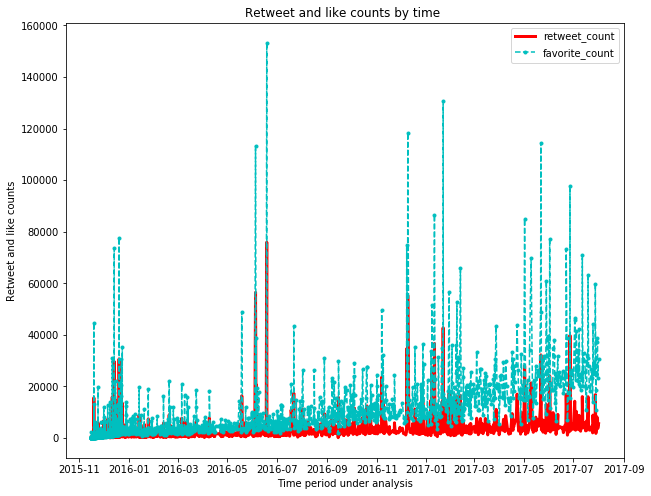

In [271]:
timestamps = master_df.timestamp
retweet = master_df.retweet_count
like = master_df.favorite_count
plt.subplots(figsize=(10,8))
retweet_plot = plt.plot(timestamps,retweet, color='r', ls='-', linewidth= 3 )
like_plot = plt.plot(timestamps,like, color='c', ls='--', marker='.')
plt.title('Retweet and like counts by time ')
plt.xlabel('Time period under analysis')
plt.ylabel('Retweet and like counts')
plt.legend()
;
#['2015-11', '2016-01', '2016-03', '2016-05', '2016-07', '2016-09', '2017-01', '2017-03', '2017-05', '2017-07', '2017-09']

### Conclusion
- In the interval between 2016-05 and 2016-07,  WeRateDogs page was most trending.<br>
- also we can notice that there are generaly four intervals that the page was Trending at (have peaks in retweet and like counts,<br>
 those four intervals are:<br>
    1. 2015-11 to 2016-01
    2. 2016-05 to 2016-07 (the most trendig period)
    3. 2016-11 to 2017-03
    4. 2017-05 to 2017-09

## Q2: what is the rating value most trending?

''

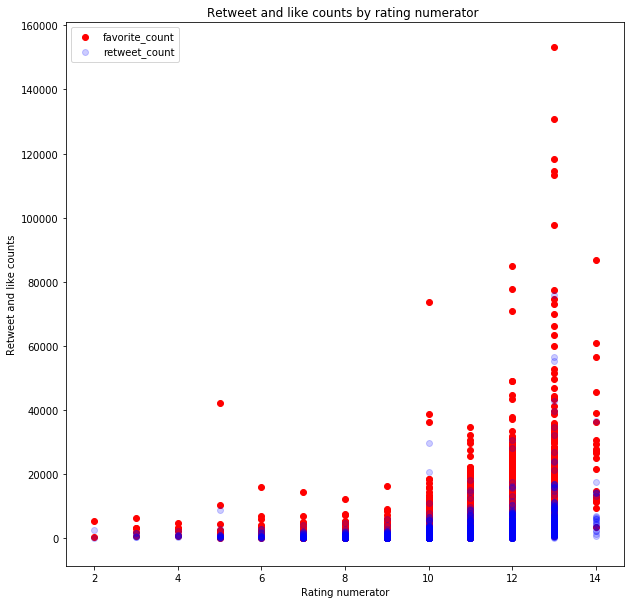

In [272]:
retweets = master_df.retweet_count
likes = master_df.favorite_count
ratings = master_df.rating_numerator
plt.subplots(figsize=(10,10))

like_plot = plt.scatter(ratings,like,color='r', alpha= 1)
retweet_plot = plt.scatter(ratings,retweet,color='b', alpha= 0.2)
plt.title('Retweet and like counts by rating numerator ')
plt.xlabel('Rating numerator')
plt.ylabel('Retweet and like counts')
plt.legend()
;

### Conclusion
- From the plot above we can conclude that tweets with rating equal to 13/10 are the most trending tweets

## Q3: what is the top dog breed with average retweet count?

In [273]:
top_5_retweets = master_df.groupby('dog_breed').mean().retweet_count.nlargest(5)
top_5_retweets

dog_breed
Bedlington_terrier    7161.333333
Afghan_hound          5102.000000
standard_poodle       4768.000000
French_bulldog        4705.033333
English_springer      4686.100000
Name: retweet_count, dtype: float64

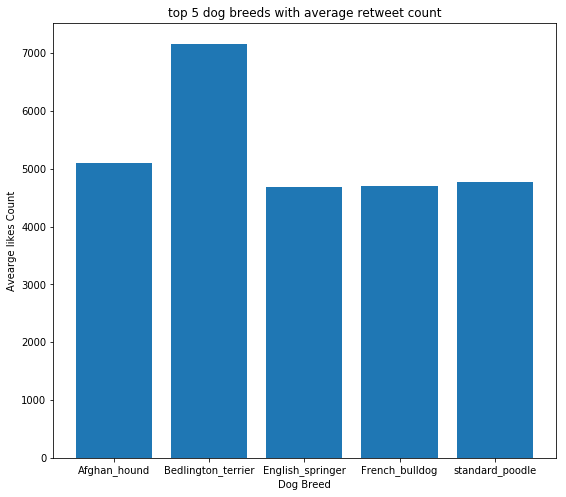

In [274]:
breed_retweets = top_5_retweets.index
plt.subplots(figsize=(9,8))
plt.bar(breed_retweets, top_5_retweets)
plt.title('top 5 dog breeds with average retweet count')
plt.xlabel('Dog Breed')
plt.ylabel('Avearge Retweet Count')
plt.title('top 5 dog breeds with average retweet count')
plt.xlabel('Dog Breed')
plt.ylabel('Avearge likes Count');

### Conclusion
- Bedlington_terrier rating tweets recievd the most average retweet counts 

## Q4: What is the top dog breed with mean likes count?

In [275]:
top_breed_likes = master_df.groupby('dog_breed').mean().favorite_count.nlargest(5)
top_breed_likes.sort_values()

dog_breed
Afghan_hound            15502.333333
Bouvier_des_Flandres    16171.000000
French_bulldog          18439.400000
Saluki                  21847.500000
Bedlington_terrier      22724.833333
Name: favorite_count, dtype: float64

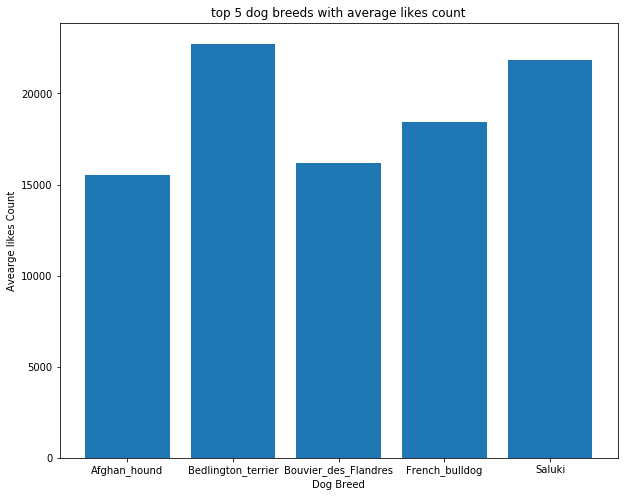

In [276]:
breed_likes = top_breed_likes.index
plt.subplots(figsize=(10,8))
plt.bar(breed_likes, top_breed_likes)
plt.title('top 5 dog breeds with average likes count')
plt.xlabel('Dog Breed')
plt.ylabel('Avearge likes Count');

### Conclusion
- Bedlington terrier rating tweets recievd the most average like counts<br> 
<em> - From this insight and the one above it, Depending on the provided data we can conclude that,<br> the most trending dog breed was Bedlington terrier (recieved the most average like and retweet counts)</em>

## Q5: What is the dog stage with highest average number of retweets? 

In [277]:
top_stage_retweets = master_df.groupby('dog_stage').mean().retweet_count
top_stage_retweets

dog_stage
doggo            6372.981132 
doggo-floofer    2991.000000 
doggo-pupper     4194.285714 
doggo-puppo      17034.000000
floofer          4252.285714 
pupper           2116.848485 
puppo            5618.142857 
Name: retweet_count, dtype: float64

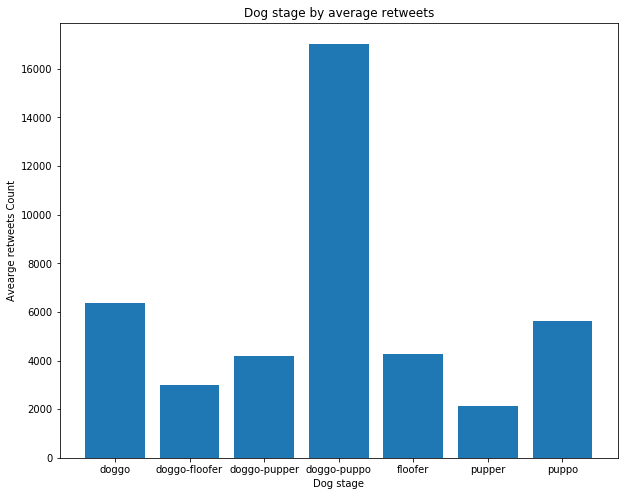

In [278]:
stage_retweets = top_stage_retweets.index
plt.subplots(figsize=(10,8))
plt.bar(stage_retweets, top_stage_retweets)
plt.title('Dog stage by average retweets')
plt.xlabel('Dog stage')
plt.ylabel('Avearge retweets Count');

### Conclusion
- Dog stage between doggo and puppo gets the highest average number of retweets,<br> Indicating that it may be more trending than other dog stages 

## Q6: What is the dog stage with highest average number of likes? 

In [279]:
top_stage_likes = master_df.groupby('dog_stage').mean().favorite_count
top_stage_likes

dog_stage
doggo            18793.226415
doggo-floofer    15596.000000
doggo-pupper     13742.857143
doggo-puppo      43770.000000
floofer          11829.142857
pupper           6914.557576 
puppo            20534.047619
Name: favorite_count, dtype: float64

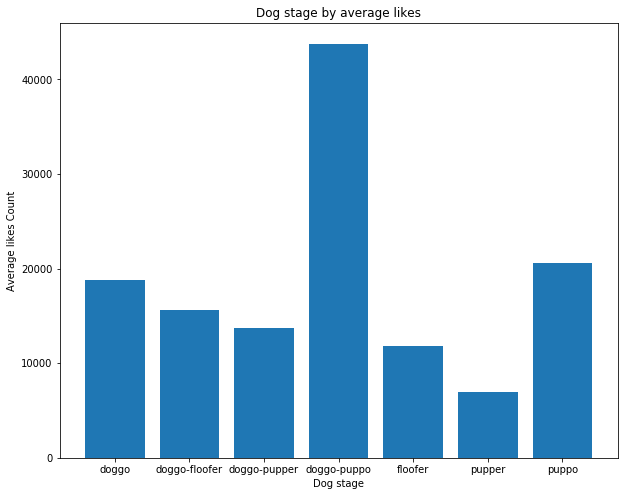

In [280]:
stage_likes = top_stage_likes.index
plt.subplots(figsize=(10,8))
plt.bar(stage_likes, top_stage_likes)
plt.title('Dog stage by average likes')
plt.xlabel('Dog stage')
plt.ylabel('Average likes Count');

### Conclusion
- Dog stage between doggo and puppo gets the highest average number of likes<br>
<em> - From this insight and the one above it, Depending on the provided data we can conclude that,<br> the most trending dog stage was Dog stage between doggo and puppo (recieved the most average like and retweet counts)</em>